# Case study on Supervised learning

## ML Model: To Predict Iris Species

### Dataset = 'iris.xls'

#### Do the following in the iris dataset.
#### 1. Read the dataset to the python environment.
#### 2. Do necessary pre-processing steps.
#### 3. Find out which classification model gives the best result to predict iris species (also do random forest algorithm).

### Also, mention which model gives the best result in your file and justify your answer.

### Steps involved in creating a well-defined Machine Learning Project:
**1. Understanding and defining the problem  
2. Collecting, Analysing and Preparing data  
3. Applying suitable algorithms - model building, selection & training  
4. Testing & Tuning (Error reduction, accuracy boosting)  
5. Accurate Result Prediction**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Reading dataset to python environment

In [2]:
#loading dataset to DataFrame 'data'
data = pd.read_excel('iris.xls')

In [3]:
#display first five rows of dataset
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#display last five rows of dataset
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#count of instances and attributes of dataset
data.shape

(150, 5)

**There are 150 rows & 5 columns for the dataset.  
DataFrame has four features: Sepal length, sepal width, petal length and petal width**

In [6]:
#understanding data types & info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**SL has 7 null values, SW & PL has 6 each.  
Classification belongs to object-datatype.**

## Problem Statement:
**This data set consists of the physical parameters of three species of iris: Versicolor, Setosa and Virginica.  
The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length.  
The data consists of continuous numeric values which describe the dimensions of the respective features.  
We will be training the model based on these features.  
We will be predicting the classification of the flower iris based on these parameters.**

## Data Pre-processing steps:

In [7]:
#Identifying & Handling missing values

In [8]:
#finding the count of missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
#filling null values in 'SL' with the median value
data['SL'].median()
data['SL'].fillna(data['SL'].median(),inplace=True)
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
#filling null values in 'SW' with the median value
data['SW'].median()
data['SW'].fillna(data['SL'].median(),inplace=True)
data.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
#filling null values in 'SW' with the median value
data['PL'].median()
data['PL'].fillna(data['PL'].median(),inplace=True)
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
#All missing & null values are filled.

In [13]:
#statistical summary;count, mean, min and max values, percentiles(columnwise)
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.159333,3.780000,1.198667
std,0.808567,0.685917,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,5.800000,6.900000,2.500000


In [14]:
#classification Distribution
#checking number of instances belonging to each classification
data.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [15]:
#we can see that each classification has the same number of instances(50)

### Data Visualization:

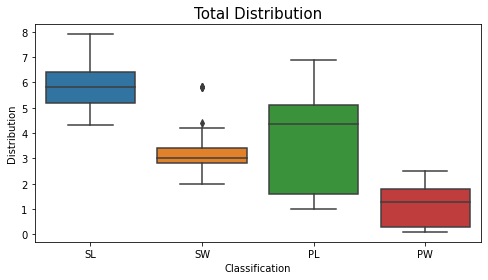

In [16]:
#Analysing the data visually using boxplot
plt.figure(figsize=(8,4))
sns.boxplot(data=data)
plt.xlabel("Classification")
plt.ylabel("Distribution")
plt.title("Total Distribution", fontsize = 15)
plt.show()

**Box plot is percentile-based graph that divides the data into four quartiles of 25% each.  
This method is used in statistical analysis to understand various measures such as mean, median and deviation.  
In this dataset, we have Outliers in Sepal Width(SW)** 

In [17]:
#Handling outliers in SW
#Quartiles
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

#Interquartile and limits
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [18]:
#Replacing outlier values with upper limit and lower limit 
data['SW']=np.where(data['SW']>upper_limit,upper_limit,
                         np.where(data['SW']<low_limit,low_limit,data['SW']))
data['SW']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SW, Length: 150, dtype: float64

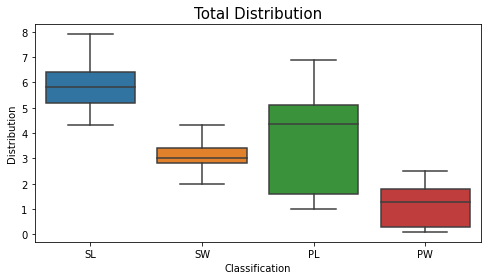

In [19]:
#Analysing the data after replacing outliers
plt.figure(figsize=(8,4))
sns.boxplot(data=data)
plt.xlabel("Classification")
plt.ylabel("Distribution")
plt.title("Total Distribution", fontsize = 15)
plt.show()

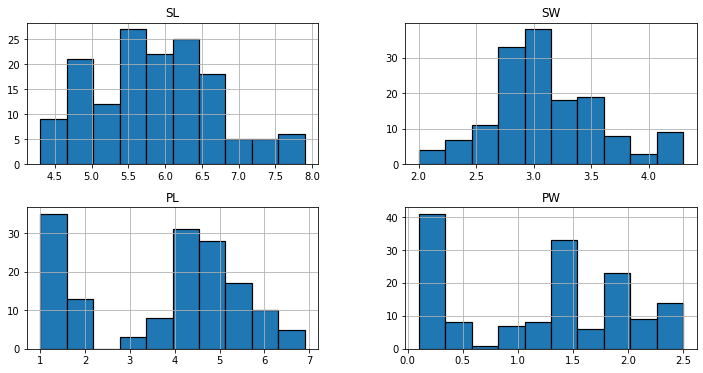

In [20]:
#Analysing the data visually using histograms
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

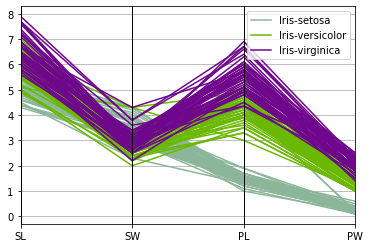

In [21]:
#multivariate visualization using parallel_coordinates
from pandas.plotting import parallel_coordinates
parallel_coordinates(data,"Classification")
plt.show()

In [22]:
#Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample

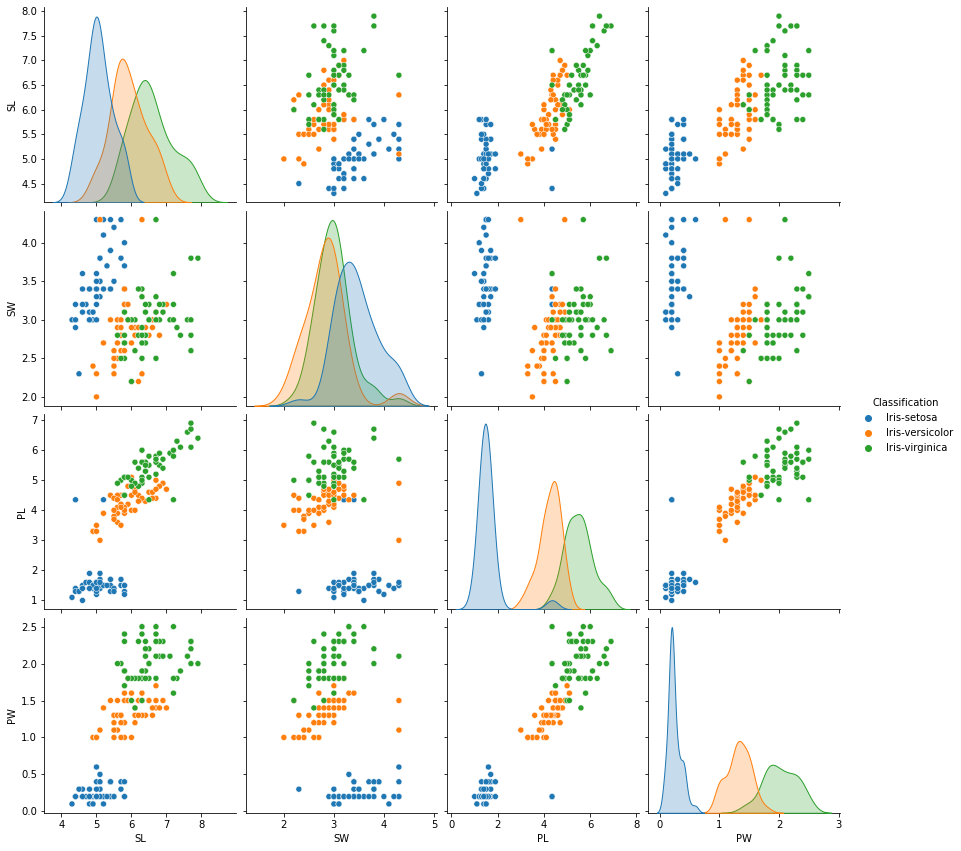

In [23]:
#Analysing the data visually using pairplot/scatterplot
#Pairplot/Scatter plot is used to understand how each feature accounts for classification of the data.
sns.pairplot(data, hue="Classification", height=3)
plt.show()

### From the pairplot, we see that the Iris-setosa species is separated from the other two across all feature combinations

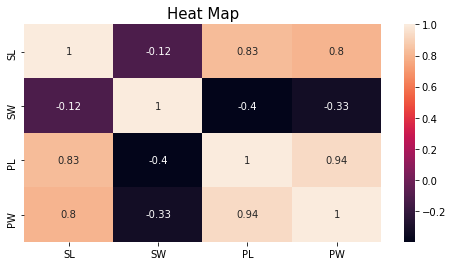

In [24]:
#Analysing the data visually using correlation heatmap
plt.figure(figsize=(8,4))
x = data.corr()
sns.heatmap(x,annot=True)
plt.title("Heat Map", fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [25]:
#Correlation method helps to figure out the important features which account the most for the classification in our model.

**Observation:  
Sepal Width and Sepal Length are not correlated  
Petal Width and Petal Length are highly correlated  
We will use all the features for training the algorithm and check the accuracy.  
Then we will use feature reduction to check the accuracy of the algorithm.**

## Building a Prediction Model:

In [26]:
#Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

In [27]:
#Regression: If the desired output consists of one or more continuous variables, then the task is called regression.
#Eg:- Prediction of height of a person as a function of age and weight.

In [28]:
#Now the given problem is a classification problem.
#Thus we will be using classification algorithms to build a model.

In [29]:
#Attributes/Features: attribute/feature is a property of an instance that may be used to determine its classification.
#Here, the attributes are the petal and sepal length and width.
#Target variable: target variable is the variable that is or should be the output.
#Here the target variables are the 3 flower species.

In [30]:
#When we train any algorithm, the number of features and their correlation plays an important role.
#If most of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy.
#Thus feature selection should be done carefully.

In [31]:
#Applying the algorithm:

#Steps To Be followed when Applying an Algorithm:

#Split the dataset into training and testing dataset.
#The testing dataset is generally smaller than training one as it will help in training the model better.
#Select any algorithm based on the problem (classification or regression).
#Then pass the training dataset to the algorithm to train it.
#We use the fit() method.
#Then pass the testing data to the trained algorithm to predict the outcome.
#We use the predict() method.
#We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [32]:
#Training the model

#Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is.

#1. Logistic Regression

#2. K – Nearest Neighbour (KNN)

#3. Support Vector Machine (SVM)

#4. Decision Trees

#5. Naive Bayes classifier

In [33]:
#importing all the necessary packages for various classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [34]:
#assigning variables to features and target
#separating the data into dependent and independent variables

x = data.drop('Classification', axis=1)
y = pd.DataFrame(data['Classification'])

In [35]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [36]:
#splitting The Data into Training And Testing Dataset
#splits the data into 80% and 20% ratio; train=80% and test=20%

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, test_size=0.2)

In [37]:
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('x_test :',x_test.shape)
print('y_test :',y_test.shape)

x_train : (120, 4)
y_train : (120, 1)
x_test : (30, 4)
y_test : (30, 1)


In [38]:
x_train.head()

,SL,SW,PL,PW
14,5.8,4.0,1.2,0.2
24,4.8,3.4,1.9,0.2
139,6.9,3.1,5.4,2.1
58,6.6,2.9,4.6,1.3
8,4.4,2.9,1.4,0.2


In [39]:
y_train.head()

,Classification
14,Iris-setosa
24,Iris-setosa
139,Iris-virginica
58,Iris-versicolor
8,Iris-setosa


### 1. Logistic Regression Model

In [40]:
#Logistic regression works on two schemes, first, if it is a binary classification problem, it works as one vs the rest, and if it is a multi class classification problem it works as one vs many.

In [41]:
#Logistic Regression
warnings.filterwarnings('ignore')
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Logistic Regression is:  0.9666666666666667


**Logistic Regression Model is giving good accuracy.  
We will continue to check the accuracy for different models.**

### 2. K-Nearest Neighbors

In [42]:
#K-Nearest Neighbors
#5 neighbors for putting data into a particular classification
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of KNN is:  0.9666666666666667


In [43]:
#Let's check the accuracy for various values of n for K-Nearest nerighbours

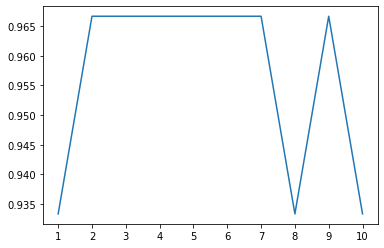

In [44]:
k_index = list(range(1,11))
k = pd.Series(dtype=int)
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    k = k.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(k_index, k)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)
plt.show()

In [45]:
#Above is the graph showing the accuracy for the KNN models using different values of n.
#Accuracy is 96% for n=2 to n=7; n=5 is selected to train the model

### 3. Support Vector Machine SVM

In [46]:
#Support Vector Machine model works on the principle of Radial Basis function with default parameters.

In [47]:
#select the svm algorithm
model = svm.SVC()

#we train the algorithm with training data and training output
model.fit(x_train, y_train)

#we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(x_test)

#we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of the SVM is:  0.9666666666666667


### 4. Decision Tree

In [48]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Decision Tree is:  0.9666666666666667


### 5. Gaussian Naive Bayes Classifier

In [49]:
#This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning.
#This is especially useful when the whole dataset is too big to fit in memory at once.

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('The accuracy of Gaussian Naive Bayers Classifier is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Gaussian Naive Bayers Classifier is:  1.0


In [51]:
#We used all the features of iris in above models
#Now we will use Petals and Sepals Seperately

### Creating Petals And Sepals Training Data

In [52]:
petal = data[['PL','PW','Classification']]
sepal = data[['SL','SW','Classification']]

In [53]:
#For Iris Petal

In [54]:
#petals
train_p,test_p = train_test_split(petal, test_size=0.2, random_state=3) 
train_x_p = train_p[['PW','PL']]
train_y_p = train_p.Classification

test_x_p = test_p[['PW','PL']]
test_y_p = test_p.Classification

In [55]:
#For Iris Sepal

In [56]:
#sepals
train_s,test_s = train_test_split(sepal, test_size=0.2, random_state=3)
train_x_s = train_s[['SW','SL']]
train_y_s = train_s.Classification

test_x_s = test_s[['SW','SL']]
test_y_s = test_s.Classification

In [57]:
#1. Logistic Regression

In [58]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9666666666666667
The accuracy of the Logistic Regression using Sepals is: 0.7333333333333333


In [59]:
#2. K-Nearest Neighbors

In [60]:
model=KNeighborsClassifier(n_neighbors=5) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9666666666666667
The accuracy of the KNN using Sepals is: 0.6666666666666666


In [61]:
#3. SVM Algorithm

In [62]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9333333333333333
The accuracy of the SVM using Sepals is: 0.7333333333333333


In [63]:
#4. Decision Tree

In [64]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9666666666666667
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [65]:
#5. Gaussian Naive Bayes Classifier

In [66]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of Gaussian Naive Bayes Classifier using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of Gaussian Naive Bayes Classifier using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of Gaussian Naive Bayes Classifier using Petals is: 0.9666666666666667
The accuracy of Gaussian Naive Bayes Classifier using Sepals is: 0.7333333333333333


**Observations:  
Using Petals over Sepal for training the data gives a much better accuracy.  
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.**

### LinearDiscriminantAnalysis Classifier

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

#Linear Discriminant Analysis or Normal Discriminant Analysis or Discriminant Function Analysis is a dimensionality reduction technique that is commonly used for supervised classification problems.
#It is used for modelling differences in groups i.e. separating two or more classes. 

model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)

prediction = model.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

# Accuracy score
print('accuracy is',accuracy_score(prediction,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
accuracy is 0.9666666666666667


### Gradient Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

prediction = model.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

# Accuracy score
print('accuracy is',accuracy_score(prediction,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
accuracy is 0.9666666666666667


### Random Forest Classifier

In [69]:
#Randomforest is one of the highly accurate nonlinear algorithm, which works on the principle of Decision Tree Classification.

In [70]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('The accuracy of Random Forest Classifier is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Random Forest Classifier is:  0.9333333333333333


In [71]:
#Let’s test different algorithms:

#LogisticRegression
#KNeighborsClassifier
#Support Vector Machines
#DecisionTreeClassifier
#GaussianNB
#RandomForestClassifier
#LinearDiscriminantAnalysis
#GradientBoostingClassifier

In [72]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
#evaluate a score by cross-validation

In [73]:
#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', svm.SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GB', GradientBoostingClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.933333 (0.089753)
KNN: 0.941667 (0.083749)
SVM: 0.933333 (0.081650)
CART: 0.916667 (0.083333)
GNB: 0.941667 (0.065085)
RFC: 0.950000 (0.066667)
LDA: 0.941667 (0.065085)
GB: 0.916667 (0.083333)


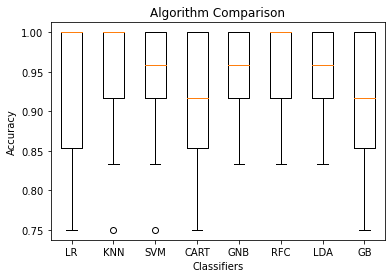

In [74]:
#Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()

In [75]:
#We can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 95% accuracy, and some pushing down into the high 80% accuracies.

### Comments:  
**It looks like KNN classifier has the largest estimated accuracy score at about 98%  
With range between 0.91 and 1.0  
Standard deviation of KNN is comparable and median is about 0.99  
KNN Classifier predictions can be assumed to be more accurate.**

In [76]:
#We can evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report.

In [77]:
#Creating a Randomforest validation dataset
model = RandomForestClassifier(n_estimators=5)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print('The accuracy of Random Forest Classifier is: ', metrics.accuracy_score(predictions, y_test))

The accuracy of Random Forest Classifier is:  1.0


In [78]:
#The confusion matrix provides an indication of the errors made.

#Classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

In [79]:
#Evaluate predictions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

print('confusion_matrix: ',confusion_matrix(y_test, predictions))
print('\n')
print('accuracy_score: ',accuracy_score(y_test, predictions))
print('\n')
print('f1_score: ',f1_score(y_test, predictions, average='micro'))
print('\n')
print('Classification Report: ')
print(classification_report(y_test, predictions))

confusion_matrix:  [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


accuracy_score:  1.0


f1_score:  1.0


Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [80]:
#Tune the parameters

In [81]:
#Here, we select RandomForest Classifier model
#Randomforest gives an accuracy of 96.66%
#Let us tune the parameter to get a 100% accuracy
#Let us set the number of trees to be 50 to check if our model is performing well.

In [82]:
#parameter tuning for higher accuracy
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('The accuracy of Random Forest Classifier after parameter tuning is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Random Forest Classifier after parameter tuning is:  0.9666666666666667


### Comments:
**Parameter tuning by setting the number of estimators(trees) to 50 has improved the accuracy of our RandomForest Classifier to 1.0!!**

In [83]:
#calculating accuracy score of different classifiers
from sklearn.metrics import log_loss
classifiers = [LogisticRegression(), KNeighborsClassifier(), svm.SVC(),
               DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(), 
               LinearDiscriminantAnalysis(), 
               GradientBoostingClassifier()]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print(name)
    
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    print('\n')

LogisticRegression
Accuracy: 96.6667%


KNeighborsClassifier
Accuracy: 96.6667%


SVC
Accuracy: 96.6667%


DecisionTreeClassifier
Accuracy: 100.0000%


GaussianNB
Accuracy: 100.0000%


RandomForestClassifier
Accuracy: 100.0000%


LinearDiscriminantAnalysis
Accuracy: 96.6667%


GradientBoostingClassifier
Accuracy: 96.6667%




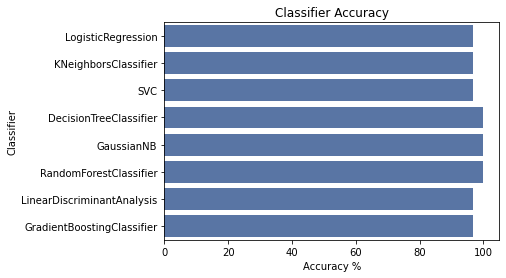

In [84]:
#barplot of Classifier Accuracy
sns.set_color_codes('deep')
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

### Conclusion:

**In Machine Learning, there is no specific model or an algorithm which can give 100% result to every single dataset.  
We need to understand the data before we apply any algorithm and build our model depending on the desired result.  
From the above models, Random Forest Classifier, Decision Tree Classifier & GaussianNB Classifier gives optimal accuracy compared to other algorithms because it works best with continuous data and it also applies a nonlinear relationship to the features.  
By using these algorithms, we can reduce the chances of overfitting and the variance in the data which thus leads to better accuracy.**